# 6 Object Detection
- Template matching
- Corner detection
- Edge Detection
- Grid detection
- Contour detection
- Feature matching: most advanced method
- Watershed
- Facial and eye detection with Haar cascades
- Project: blurring license plates

## 6.5 Contour Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
img = cv2.imread('../../data/internal_external.png',0) #grayscale

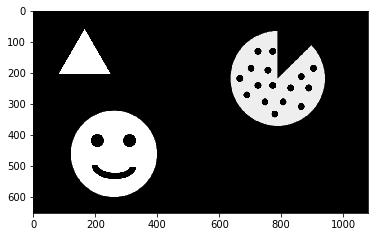

In [6]:
plt.imshow(img, cmap='gray')

In [13]:
# cv2.findContours() can return internal and external contours
# We choose which contours to get
# - cv2.RETR_CCOMP: all
# - cv2.RETR_EXTERNAL external
# We choose also the method used, eg: cv2.CHAIN_APPROX_SIMPLE
image,contours,hierarchy = cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [10]:
type(contours)

list

In [11]:
len(contours)

22

In [16]:
# hierarchy is of shape (1,len(contours),4)
# last index value contains contour grouping ids
# < 0 -> external
# >= 0 -> internal
# contours that are inside a specific contour have a a specific group id
# thus, internal contours are grouped
hierarchy.shape

(1, 22, 4)

In [19]:
external_contours = np.zeros(img.shape)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1: # external contour
        # dst image
        # ALL contours
        # color
        # thickness; if -1, fill
        cv2.drawContours(external_contours, contours, i, 255, -1)

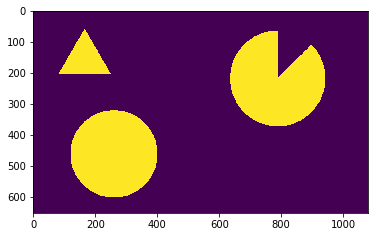

In [20]:
plt.imshow(external_contours)

In [21]:
internal_contours = np.zeros(img.shape)
for i in range(len(contours)):
    if hierarchy[0][i][3] != -1: # external contour
        # dst image
        # ALL contours
        # color
        # thickness; if -1, fill
        cv2.drawContours(internal_contours, contours, i, 255, -1)

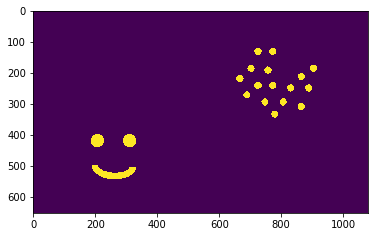

In [22]:
plt.imshow(internal_contours)